

---



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# From "part_two" of our "source data" - for Analysis specifically in Notebooks
customers = pd.read_csv('/content/df_Customers.csv')
sold_items = pd.read_csv('/content/df_OrderItems.csv')
orders = pd.read_csv('/content/df_Orders.csv')
payments = pd.read_csv('/content/df_Payments.csv')
products = pd.read_csv('/content/df_Products.csv')

print(customers.columns, customers.shape)
print('\n', sold_items.columns, sold_items.shape)
print('\n', orders.columns, orders.shape)
print('\n', payments.columns, payments.shape)
print('\n', products.columns, products.shape)

Index(['customer_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object') (89316, 4)

 Index(['order_id', 'product_id', 'seller_id', 'price', 'shipping_charges'], dtype='object') (89316, 5)

 Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date'],
      dtype='object') (89316, 7)

 Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object') (89316, 5)

 Index(['product_id', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object') (89316, 6)


In [6]:
# Combining them all Meticulously and as needed, for Further Analysis & Modeling
orders_payments = pd.merge(sold_items, orders, on = 'order_id')
orders_payments = pd.merge(orders_payments, payments, on = 'order_id')
orders_payments = pd.merge(orders_payments, products, on = 'product_id')
orders_payments = pd.merge(orders_payments, customers, on = 'customer_id')

orders_payments.shape
print("")
orders_payments.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529486 entries, 0 to 2529485
Data columns (total 23 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   product_id                     object 
 2   seller_id                      object 
 3   price                          float64
 4   shipping_charges               float64
 5   customer_id                    object 
 6   order_status                   object 
 7   order_purchase_timestamp       object 
 8   order_approved_at              object 
 9   order_delivered_timestamp      object 
 10  order_estimated_delivery_date  object 
 11  payment_sequential             int64  
 12  payment_type                   object 
 13  payment_installments           int64  
 14  payment_value                  float64
 15  product_category_name          object 
 16  product_weight_g               float64
 17  product_length_cm              float64
 18  p

In [7]:
orders_payments.head(5)

,order_id,product_id,seller_id,price,shipping_charges,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,customer_city,customer_state
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP
1,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP
2,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP
3,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP
4,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP


In [8]:
# Column Data Type Conversions

timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_timestamp']

for i in timestamp_cols:
  orders_payments[i] = pd.to_datetime(orders_payments[i], format = '%Y-%m-%d %H:%M:%S')

orders_payments['customer_zip_code_prefix'] = orders_payments['customer_zip_code_prefix'].astype(str)
orders_payments['order_estimated_delivery_date'] = pd.to_datetime(orders_payments['order_estimated_delivery_date'],
                                                                  format = '%Y-%m-%d')

df = orders_payments.copy()

# Rechecking, now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529486 entries, 0 to 2529485
Data columns (total 23 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       object        
 1   product_id                     object        
 2   seller_id                      object        
 3   price                          float64       
 4   shipping_charges               float64       
 5   customer_id                    object        
 6   order_status                   object        
 7   order_purchase_timestamp       datetime64[ns]
 8   order_approved_at              datetime64[ns]
 9   order_delivered_timestamp      datetime64[ns]
 10  order_estimated_delivery_date  datetime64[ns]
 11  payment_sequential             int64         
 12  payment_type                   object        
 13  payment_installments           int64         
 14  payment_value                  float64       
 15  product_categor

## Feature Engineering:

In [9]:
# Customer Location
df['customer_city_state'] = df['customer_city'] + '_' + df['customer_state']

# Each Product's Overall Dimensions
def product_dimension_calculator(df):
  for i in df[['product_length_cm', 'product_height_cm', 'product_width_cm']]:
    if df[i].dtype != 'float64':
      df[i] = df[i].astype(float)
      df[i] = df[i].fillna(0)
    elif df[i].dtype == 'float64':
      df[i] = df[i].apply(lambda x: round(x, 2))
      df[i] = df[i].fillna(0)

  df['product_volume_cm3'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']
  return df

df = product_dimension_calculator(df)

df.head(5)

,order_id,product_id,seller_id,price,shipping_charges,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,customer_city,customer_state,customer_city_state,product_volume_cm3
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP,varzea paulista_SP,3648.0
1,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP,varzea paulista_SP,3648.0
2,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP,varzea paulista_SP,3648.0
3,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP,varzea paulista_SP,3648.0
4,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP,varzea paulista_SP,3648.0


In [10]:
# Further Feature Engineering of Potentially Useful Columns

# Breaking Down Order Purchase, Order Approval, and Order Delivery Data

df['order_purchase_date'] = df['order_purchase_timestamp'].astype(str).str.split(' ', expand = True)[0]
df['order_purchase_hr'] = df['order_purchase_timestamp'].astype(str).str.split(' ', expand = True)[1].str[:2]

df['order_approved_date'] = df['order_approved_at'].astype(str).str.split(' ', expand = True)[0]
df['order_approved_hr'] = df['order_approved_at'].astype(str).str.split(' ', expand = True)[1].str[:2]

df['order_delivery_date'] = df['order_delivered_timestamp'].astype(str).str.split(' ', expand = True)[0]
df['order_delivery_hr'] = df['order_delivered_timestamp'].astype(str).str.split(' ', expand = True)[1].str[:2]

# Product Pricing per Gram of Weight
df['price_per_gram'] = (df['price'] / df['product_weight_g']).astype(float).round(2)

# Taxes Charged on Product (Non-Shipping)
df['tax'] = (df['payment_value'] - df['price']).round(2)

df.head(5)

,order_id,product_id,seller_id,price,shipping_charges,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,customer_city,customer_state,customer_city_state,product_volume_cm3,order_purchase_date,order_purchase_hr,order_approved_date,order_approved_hr,order_delivery_date,order_delivery_hr,price_per_gram,tax
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP,varzea paulista_SP,3648.0,2017-10-22,18,2017-10-22,19,2017-10-26,22,0.46,35.63
1,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP,varzea paulista_SP,3648.0,2017-10-22,18,2017-10-22,19,2017-10-26,22,0.46,35.63
2,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP,varzea paulista_SP,3648.0,2017-10-22,18,2017-10-22,19,2017-10-26,22,0.46,35.63
3,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP,varzea paulista_SP,3648.0,2017-10-22,18,2017-10-22,19,2017-10-26,22,0.46,35.63
4,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,58125,varzea paulista,SP,varzea paulista_SP,3648.0,2017-10-22,18,2017-10-22,19,2017-10-26,22,0.46,35.63


## Visualizations & Insights:

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Total Money Spent by Payment Method

df.groupby('payment_type')['payment_value'].sum().astype(int).sort_values(ascending = False)

,payment_value
payment_type,
credit_card,516684660
wallet,151234466
voucher,38812358
debit_card,8677197


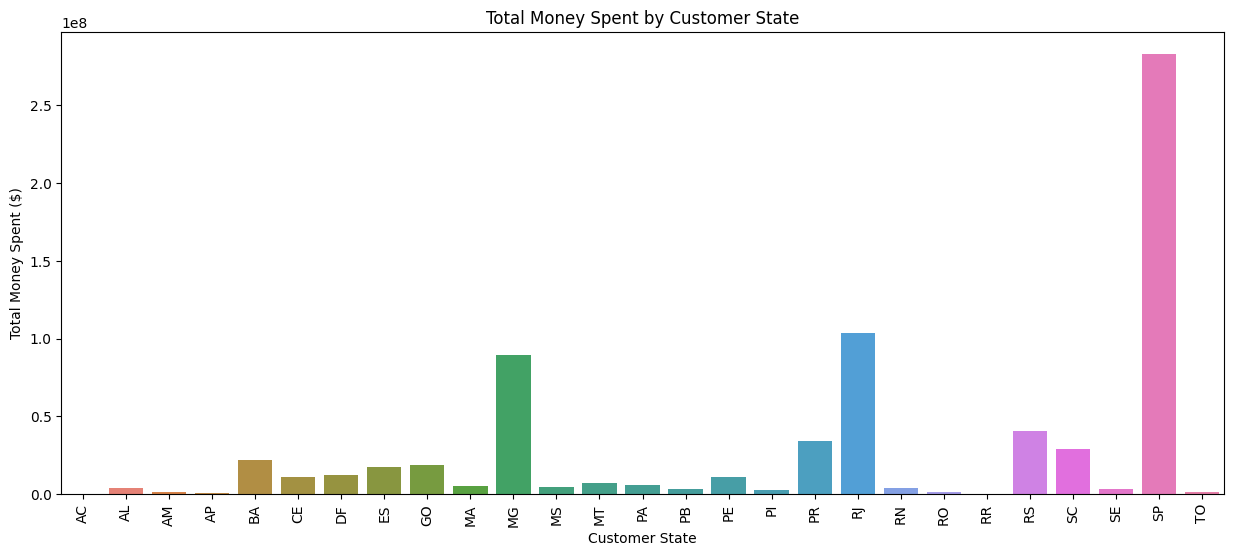

In [13]:
# Bar Graph

plt.figure(figsize = (15, 6))
sns.barplot(x = df.groupby('customer_state')['payment_value'].sum().index,
            y = df.groupby('customer_state')['payment_value'].sum().values,
            hue = df.groupby('customer_state')['payment_value'].sum().index)
plt.xlabel('Customer State')
plt.ylabel('Total Money Spent ($)')
plt.title('Total Money Spent by Customer State')
plt.xticks(rotation = 90)
plt.show()

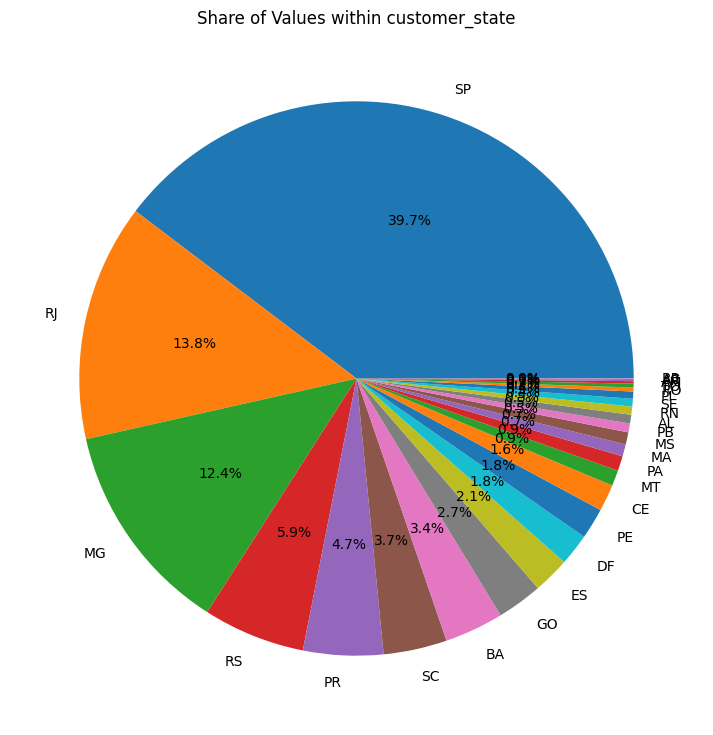

In [14]:
def piechart_maker(col):
  plt.figure(figsize = (18, 9))
  plt.pie(df[col].value_counts(normalize = True),
          labels = df[col].value_counts(normalize = True).index,
          autopct = '%1.1f%%')
  plt.title(f"Share of Values within {col}")
  plt.show()

# Let's go
piechart_maker('customer_state')

In [ ]:
# Some more Deep Analytics
df['order_purchase_month'] = df['order_purchase_timestamp'].astype(str).str.split(' ', expand = True)[0].str[5:7]

# Total Earnings by Month, Compared

monthly_revenue = df.groupby('order_purchase_month')['payment_value'].sum().astype(int)

monthly_rev_change = monthly_revenue - monthly_revenue.shift(1)

monthly_order_data = pd.DataFrame(pd.merge(monthly_revenue, monthly_rev_change, on = 'order_purchase_month'))

monthly_order_data['revenue_pct_change'] = (monthly_order_data['payment_value_x'].pct_change()*100).round(2)

monthly_order_data.rename(columns = {'payment_value_x': 'total_revenue',
                                     'payment_value_y': 'revenue_change'}, inplace = True)

monthly_order_data.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'Octomber', 'November', 'December']

monthly_order_data

In [ ]:
plt.figure(figsize = (15, 6))
plt.bar(monthly_order_data.index, monthly_order_data['total_revenue'])
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.title('Total Revenue by Month')
plt.show()

In [ ]:
# Base/Prep Work for Predicting Expenditure by Quarter of Year

## Let's Split it all into 4 Quarters of the Year, and I Hypothesize that the 4th Quarter will be most Profitable due to its Abundance of Sales & Promotional Events!

month_to_quarter_map = {
    '01': 'Q1', '02': 'Q1', '03': 'Q1',
    '04': 'Q2', '05': 'Q2', '06': 'Q2',
    '07': 'Q3', '08': 'Q3', '09': 'Q3',
    '10': 'Q4', '11': 'Q4', '12': 'Q4'
}

df['order_purchase_quarter'] = df['order_purchase_month'].map(month_to_quarter_map)